In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from numpy import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
import pandas as pd
df=pd.read_parquet("/content/drive/MyDrive/Mini project 5018/WebAttacks-Thursday-no-metadata.parquet")
df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,113095465,48,24,9668,10012,403,0,201.416672,203.548294,...,32,203985.500,5.758372e+05,1629110,379,13800000.0,4277541.0,16500000,6737603,Benign
1,6,113473706,68,40,11364,12718,403,0,167.117645,171.919418,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4229413.0,16500000,6945512,Benign
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.500,1.170000e+07,20400000,6,24400000.0,24300000.0,60100000,5702188,Benign
3,6,60261928,9,7,2330,4221,1093,0,258.888885,409.702148,...,20,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
4,17,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155815,6,49,3,0,76,0,45,0,25.333334,23.028967,...,32,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
155816,6,1286687,41,42,2664,6954,456,0,64.975609,109.864571,...,32,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
155817,6,181,3,1,18,6,6,6,6.000000,0.000000,...,20,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
155818,6,217,2,1,31,6,31,0,15.500000,21.920311,...,32,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign


In [4]:


df_min = df.iloc[:-105820]
print("Shape of trimmed dataset:", df_min.shape)
df_min

Shape of trimmed dataset: (50000, 78)


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,113095465,48,24,9668,10012,403,0,201.416672,203.548294,...,32,203985.500,5.758372e+05,1629110,379,13800000.0,4277541.0,16500000,6737603,Benign
1,6,113473706,68,40,11364,12718,403,0,167.117645,171.919418,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4229413.0,16500000,6945512,Benign
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.500,1.170000e+07,20400000,6,24400000.0,24300000.0,60100000,5702188,Benign
3,6,60261928,9,7,2330,4221,1093,0,258.888885,409.702148,...,20,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
4,17,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,17,71108,4,2,244,284,61,61,61.000000,0.000000,...,20,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
49996,17,237,2,2,136,392,68,68,68.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
49997,17,900,2,2,86,198,43,43,43.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign
49998,17,196,2,2,82,210,41,41,41.000000,0.000000,...,20,0.000,0.000000e+00,0,0,0.0,0.0,0,0,Benign


In [8]:
null_values = df.isnull().sum()
null_values

Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
                           ..
Idle Mean                   0
Idle Std                    0
Idle Max                    0
Idle Min                    0
Label                       0
Length: 78, dtype: int64

Class Counts:
Benign                        153677
Web Attack � Brute Force        1470
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name: Label, dtype: int64


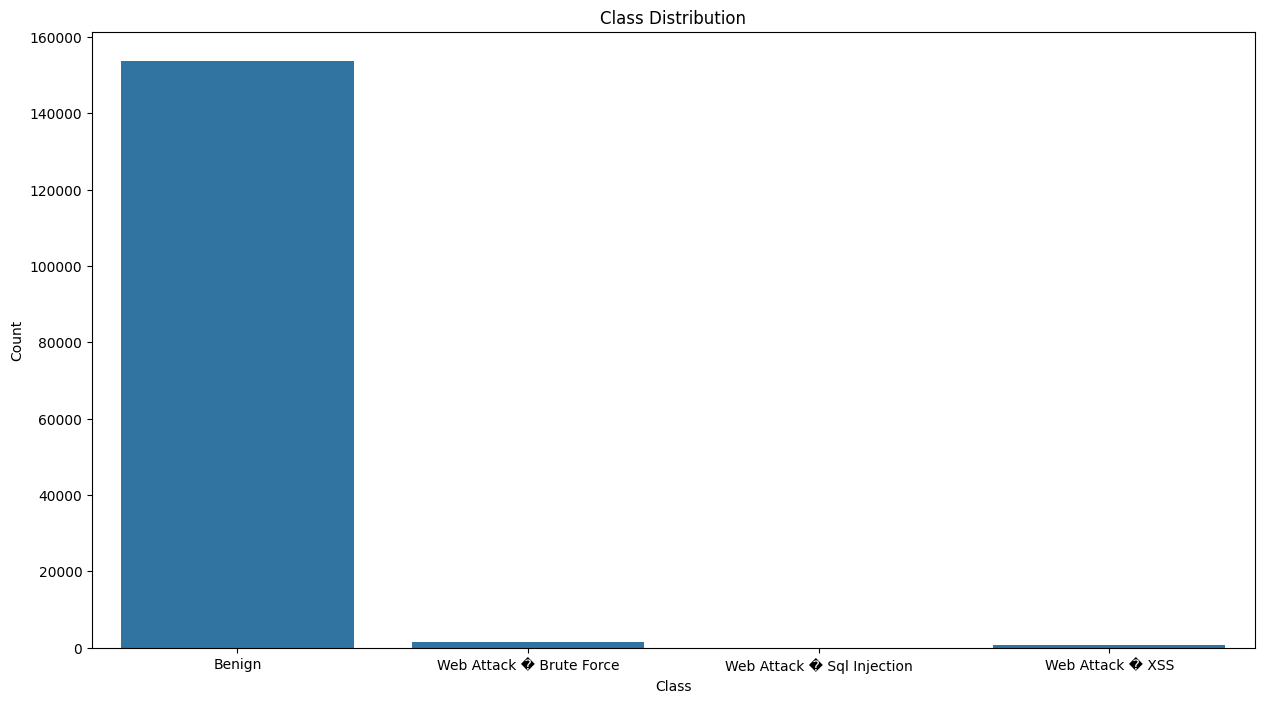

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Label'])
class_counts = df['Label'].value_counts()
print("Class Counts:")
print(class_counts)

# Plot Class Distribution
plt.figure(figsize=(15, 8))
sns.countplot(x='Label', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9951867539468617
Precision: 0.9951317074023843
Recall: 0.9951867539468617
F1 Score: 0.9951552711131288


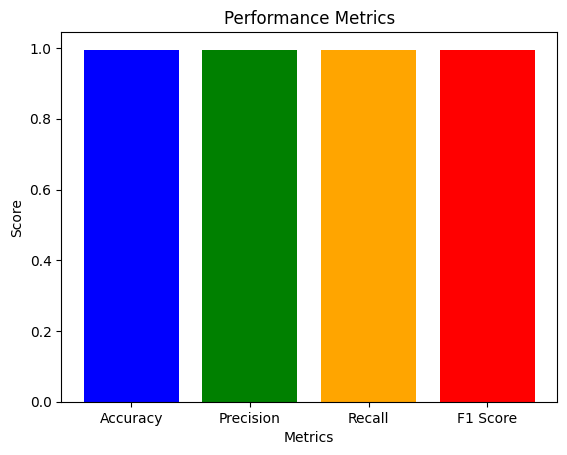

In [11]:
# Performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Create bar plot
# plt.figure(figsize=(10,10))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.show()


In [7]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred, average='weighted')
recall_nb = recall_score(y_test, y_pred, average='weighted')
f1_nb = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)

NameError: name 'X_train' is not defined

In [6]:

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_nb, precision_nb, recall_nb, f1_nb]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.show()


NameError: name 'accuracy_nb' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Label'])


Mean Squared Error: 0.0387176231501957
R^2 Score: 0.15294870165154706


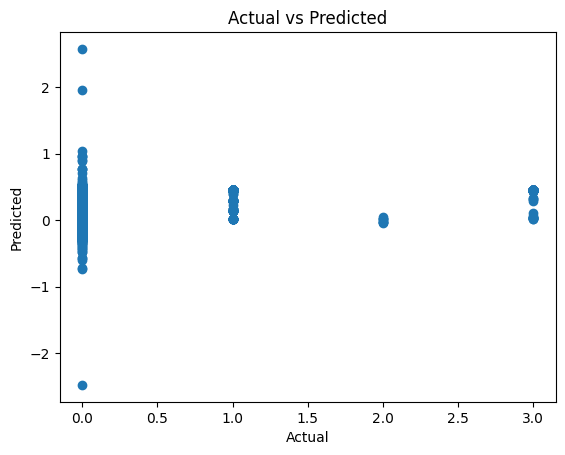

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plot predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


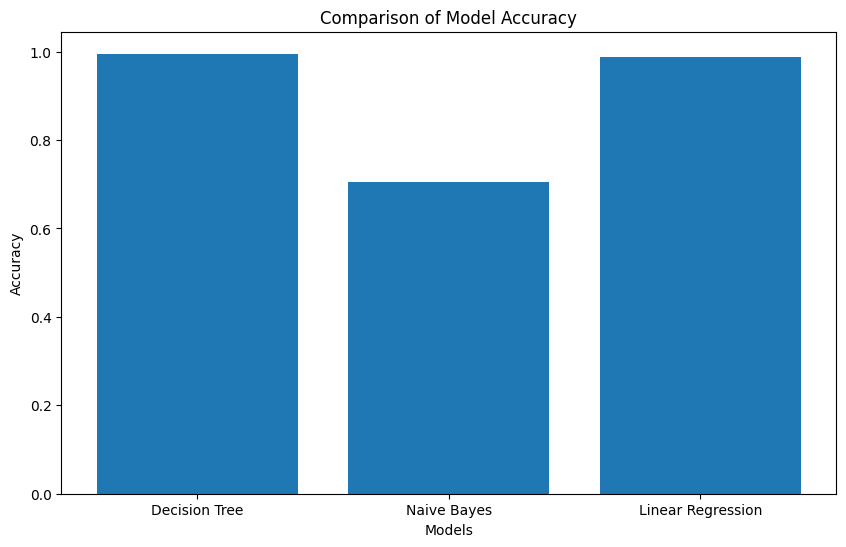

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Regression': LogisticRegression()  # Assuming it's used as a classifier
}

# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate over models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict labels for test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy score to list
    accuracy_scores.append(accuracy)

# Create a bar plot to compare the models
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.show()


Random Forest Metrics:
Accuracy: 0.9954113720960082
Precision: 0.9949930756193726
Recall: 0.9954113720960082
F1 Score: 0.9951533305542275


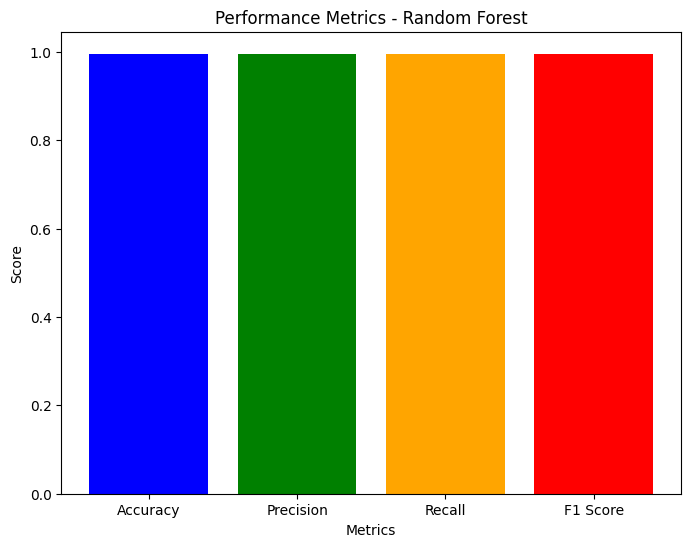

In [ ]:


# Prepare data for training
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
f1_rf = f1_score(y_test, y_pred, average='weighted')

print("Random Forest Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

# Visualization of model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_rf, precision_rf, recall_rf, f1_rf]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics - Random Forest')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Metrics:
Accuracy: 0.987325118726736
Precision: 0.9832181296758631
Recall: 0.987325118726736
F1 Score: 0.9815848875235667


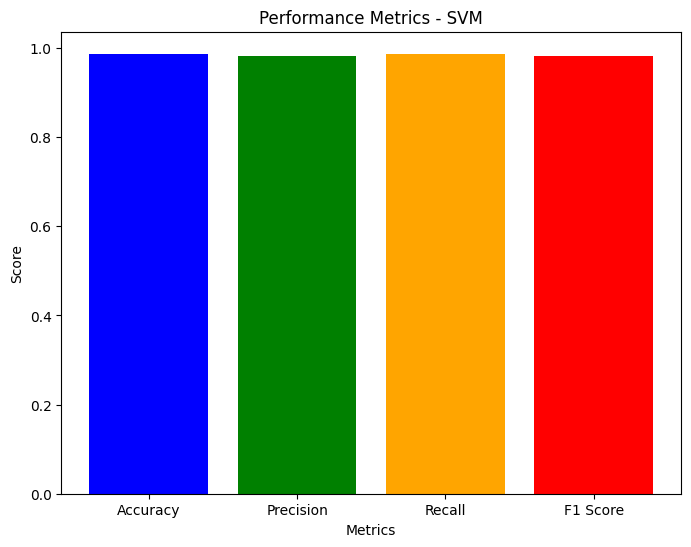

In [ ]:

from sklearn.svm import SVC


# Prepare data for training
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Support Vector Machine Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred, average='weighted')
recall_svm = recall_score(y_test, y_pred, average='weighted')
f1_svm = f1_score(y_test, y_pred, average='weighted')

print("SVM Metrics:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

# Visualization of model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_svm, precision_svm, recall_svm, f1_svm]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics - SVM')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


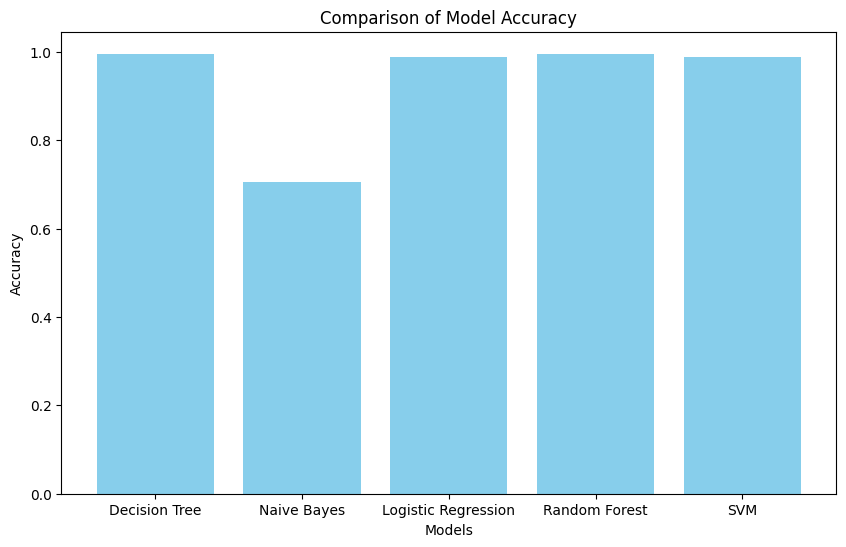

In [ ]:

# Prepare data for training
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Train models and calculate accuracy
accuracy_scores = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Visualize accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')

plt.show()
